# DATA FEATURES

1) Age: Age in years when a woman is pregnant

2) SystolicBP: Upper value of Blood Pressure in mmHg.

3) DiastolicBP: Lower value of Blood Pressure in mmHg.

4) BS: Blood glucose levels is in terms of a molar concentration, mmol/L.

5) BodyTemp: Body temperature in degree Fahrenheit.

6) HeartRate: A normal resting heart rate in beats per minute.

7) RiskLevel: (TARGET VARIABLE) Predicted risk intensity level during pregnancy considering the previous attributes. 

# IMPORTING NECESSARY LIBRARIES

In [2]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d # used in 3D plotting

import matplotlib.pyplot as plt # data visualization
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns #

# EXPLORATORY DATA ANALYSIS

In [3]:

df = pd.read_csv('Maternal_Health_Risk_Data_Set.csv')

In [4]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [5]:
df.tail()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
BS,1014.0,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
BodyTemp,1014.0,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0


# CORRELATION MATRIX

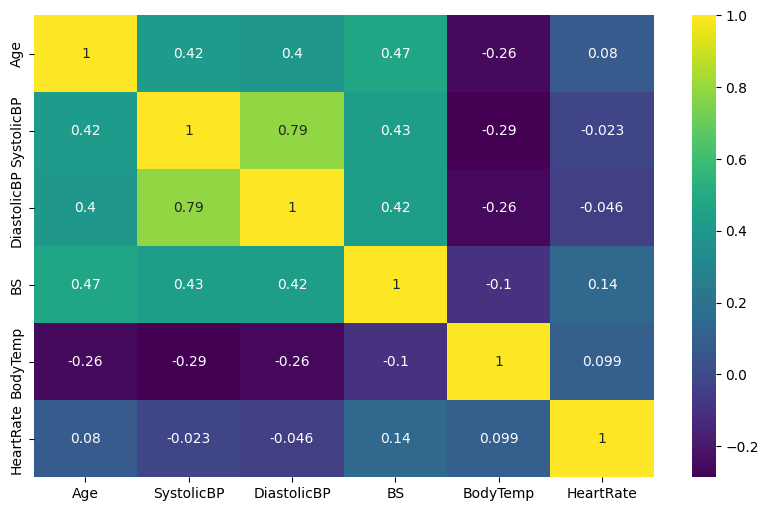

In [8]:
corr = df.corr()
max(corr)
plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap='viridis', annot=True) 
plt.show()

# DATA VISUALIZATIONS

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SystolicBP'}>],
       [<Axes: title={'center': 'DiastolicBP'}>,
        <Axes: title={'center': 'BS'}>],
       [<Axes: title={'center': 'BodyTemp'}>,
        <Axes: title={'center': 'HeartRate'}>]], dtype=object)

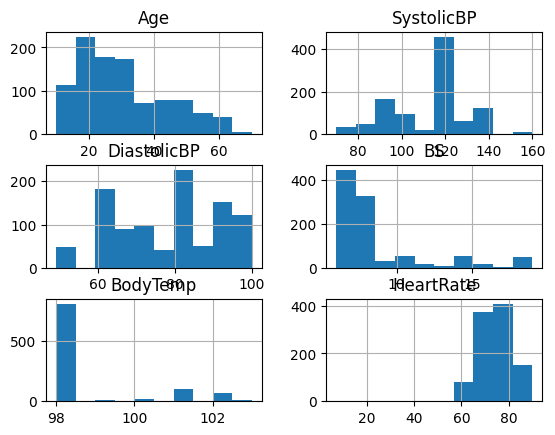

In [9]:
df.hist()

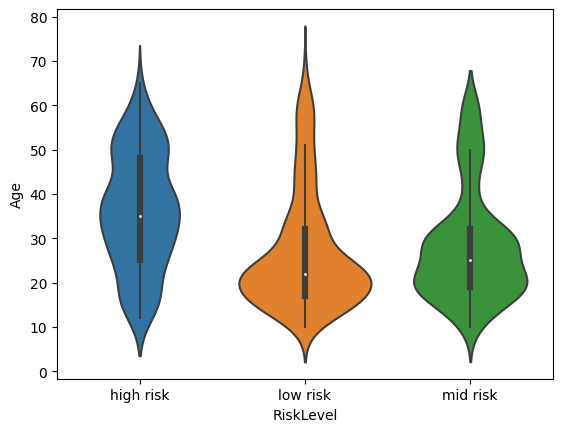

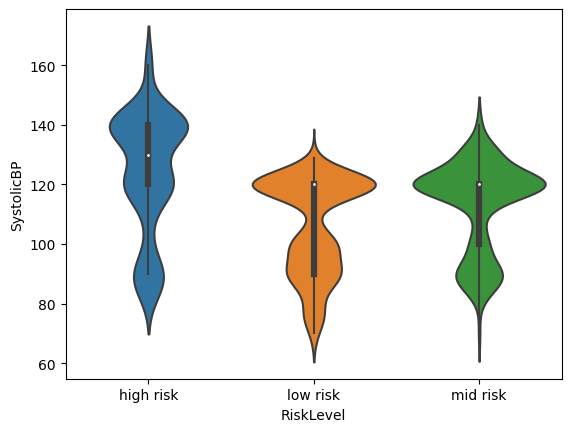

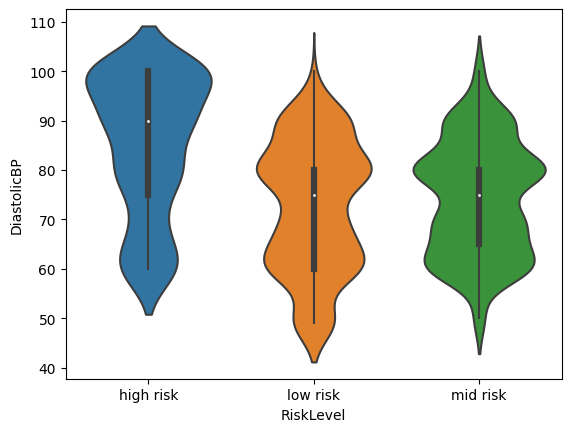

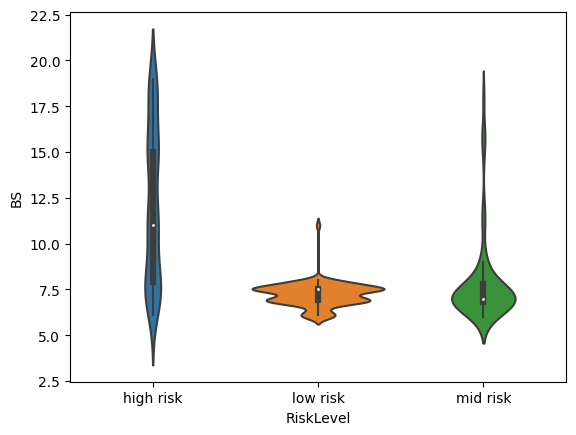

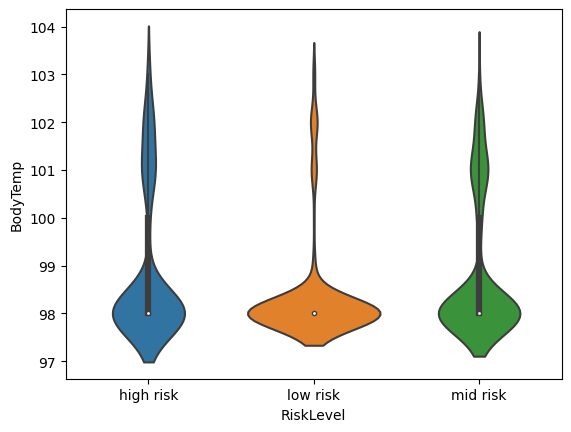

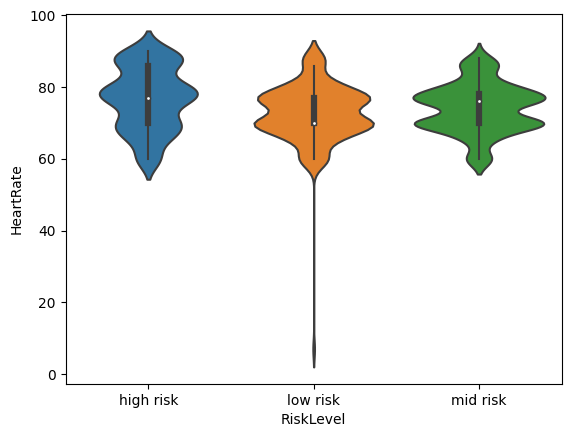

In [10]:
for col in df.columns[:-1]:
    sns.violinplot(x="RiskLevel", y=col, data=df)
    plt.show()

# TRAIN TEST SPLITTING

In [26]:
X= df.drop(['RiskLevel'], axis=1)
y = df['RiskLevel']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

In [13]:
pip install Lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# CHECKING THE ACCURACY

In [28]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

# Initialize LazyClassifier and fit on the train set
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the model performance metrics
print(models)

100%|██████████| 29/29 [00:02<00:00, 13.45it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
BaggingClassifier                  0.85               0.85    None      0.85   
RandomForestClassifier             0.84               0.84    None      0.84   
DecisionTreeClassifier             0.84               0.84    None      0.84   
LGBMClassifier                     0.83               0.84    None      0.83   
ExtraTreesClassifier               0.82               0.82    None      0.82   
ExtraTreeClassifier                0.80               0.81    None      0.80   
LabelPropagation                   0.79               0.80    None      0.79   
LabelSpreading                     0.78               0.79    None      0.78   
NuSVC                              0.72               0.72    None      0.72   
AdaBoostClassifier                 0.71               0.72    None      0.72   
SVC                                0.70 

In [31]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



# Define the BaggingClassifier
bagging = BaggingClassifier()

bagging.fit(X_train, y_train)

y_pred = bagging.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8423645320197044


# PICKLING THE MODEL

In [39]:
import pickle
with open('mat.pkl', 'wb') as files:
    pickle.dump(bagging,files)